In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

In [20]:
# Time period 
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']
data = yf.download(tickers, start=start_date, end=end_date, progress=False,actions=True)
data = data.reset_index()
data.head(5)


Price        Date        Close                                         \
Ticker             HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS   
0      2024-01-03  1650.363525  1452.584229  1287.281006  3639.307373   
1      2024-01-04  1668.071777  1474.714233  1293.933350  3614.711670   
2      2024-01-05  1659.538208  1494.065796  1299.439697  3684.801514   
3      2024-01-08  1641.040771  1484.560669  1289.299194  3626.048096   
4      2024-01-09  1628.265259  1490.897461  1285.885742  3637.483643   

Price    Dividends                                    High  ...         Open  \
Ticker HDFCBANK.NS INFY.NS RELIANCE.NS TCS.NS  HDFCBANK.NS  ...  RELIANCE.NS   
0              0.0     0.0         0.0    0.0  1681.735059  ...  1300.585825   
1              0.0     0.0         0.0    0.0  1672.116520  ...  1289.623028   
2              0.0     0.0         0.0    0.0  1681.932477  ...  1297.047791   
3              0.0     0.0         0.0    0.0  1659.686184  ...  1300.585839   
4              0.0     0.0         0.0    0.0  1655.197535  ...  1295.602763   

Price               Stock Splits                                 Volume  \
Ticker       TCS.NS  HDFCBANK.NS INFY.NS RELIANCE.NS TCS.NS HDFCBANK.NS   
0       3713.488420          0.0     0.0         0.0    0.0    14194881   
1       3649.165143          0.0     0.0         0.0    0.0    13367028   
2       3622.795130          0.0     0.0         0.0    0.0    15944735   
3       3684.801306          0.0     0.0         0.0    0.0     8999235   
4       3657.248874          0.0     0.0         0.0    0.0    12663444   

Price                                 
Ticker  INFY.NS RELIANCE.NS   TCS.NS  
0       7550363     9037536  1803075  
1       7056038     9612778  3598144  
2       8895403     8086406  1963127  
3       4440136     7734652  1067805  
4       4412074     5403074  1370944  

[5 rows x 29 columns]

In [21]:
# melt the DataFrame to make it long format
data_melted = data.melt(id_vars=['Date'], var_name=['Attribute', 'Ticker'])
# pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='value', aggfunc='first')
# reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()
print(stock_data.head())

Attribute       Date       Ticker        Close  Dividends         High  \
0         2024-01-03  HDFCBANK.NS  1650.363525        0.0  1681.735059   
1         2024-01-03      INFY.NS  1452.584229        0.0  1481.782099   
2         2024-01-03  RELIANCE.NS  1287.281006        0.0  1312.545235   
3         2024-01-03       TCS.NS  3639.307373        0.0  3718.269620   
4         2024-01-04  HDFCBANK.NS  1668.071777        0.0  1672.116520   

Attribute          Low         Open  Stock Splits      Volume  
0          1646.466666  1679.071480           0.0  14194881.0  
1          1450.634451  1481.782099           0.0   7550363.0  
2          1284.241274  1300.585825           0.0   9037536.0  
3          3634.674186  3713.488420           0.0   1803075.0  
4          1648.193203  1655.394910           0.0  13367028.0  


In [29]:
stock_data['Stock Splits'].sample(20)

Date
2024-07-05    0.0
2024-11-07    0.0
2024-07-31    0.0
2024-05-07    0.0
2024-09-20    0.0
2024-11-04    0.0
2024-12-18    0.0
2024-05-23    0.0
2024-09-26    0.0
2024-07-31    0.0
2024-09-11    0.0
2024-07-15    0.0
2025-01-01    0.0
2024-05-06    0.0
2024-08-19    0.0
2024-11-26    0.0
2024-03-27    0.0
2024-11-22    0.0
2024-09-09    0.0
2024-04-25    0.0
Name: Stock Splits, dtype: float64

**Steps for Analysis**<br>
1.Daily Returns using the Close prices.<br>
2.Expected Returns for each stock.<br>
3.Calculate the Covariance Matrix to assess the risk (volatility).<br>
4.Optimize Portfolio Weights to maximize return for a given level of risk (or maximize Sharpe ratio).<br>

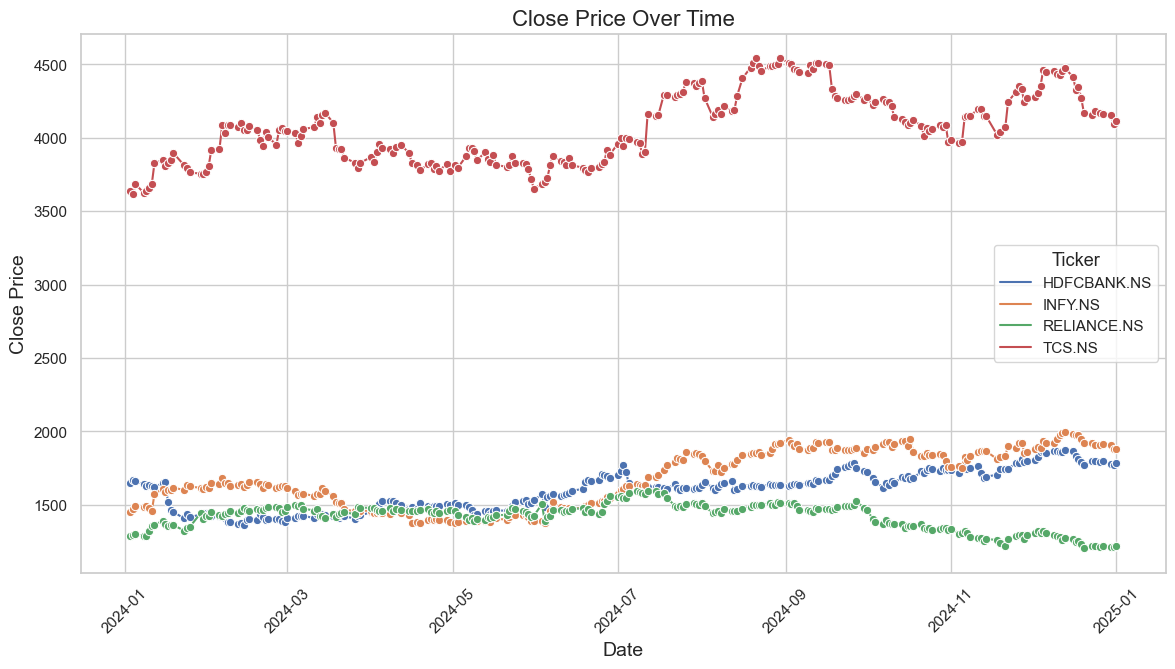

In [22]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)
stock_data.reset_index(inplace=True)
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Close', hue='Ticker', marker='o')

plt.title('Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

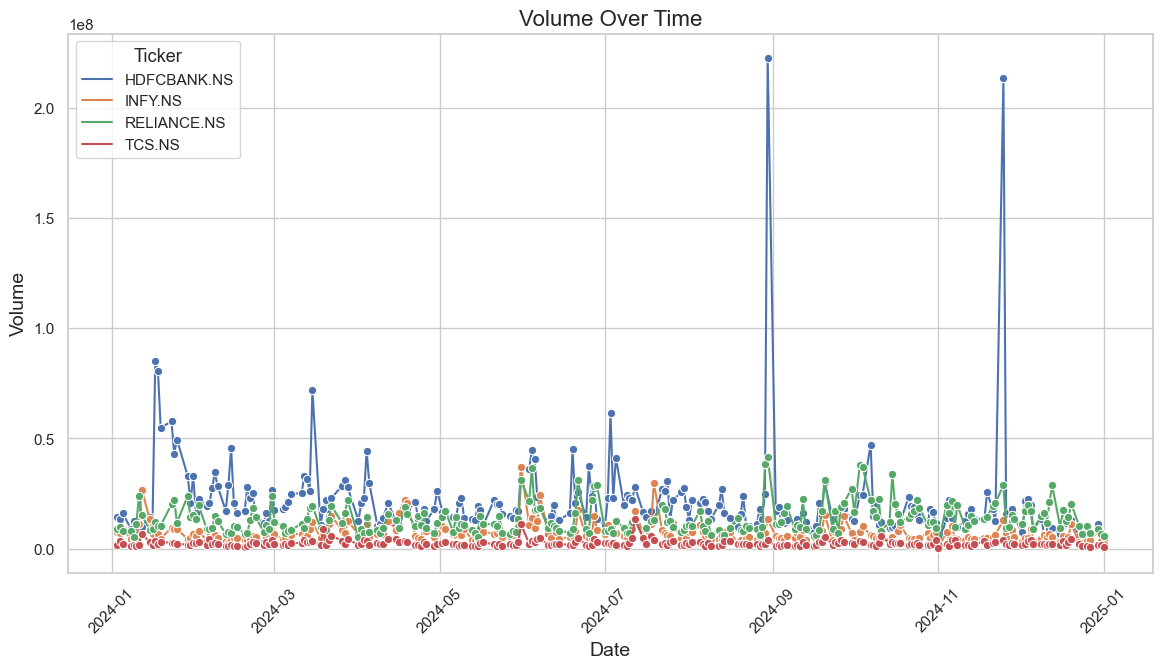

In [15]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)
stock_data.reset_index(inplace=True)
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Volume', hue='Ticker', marker='o')

plt.title('Volume Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

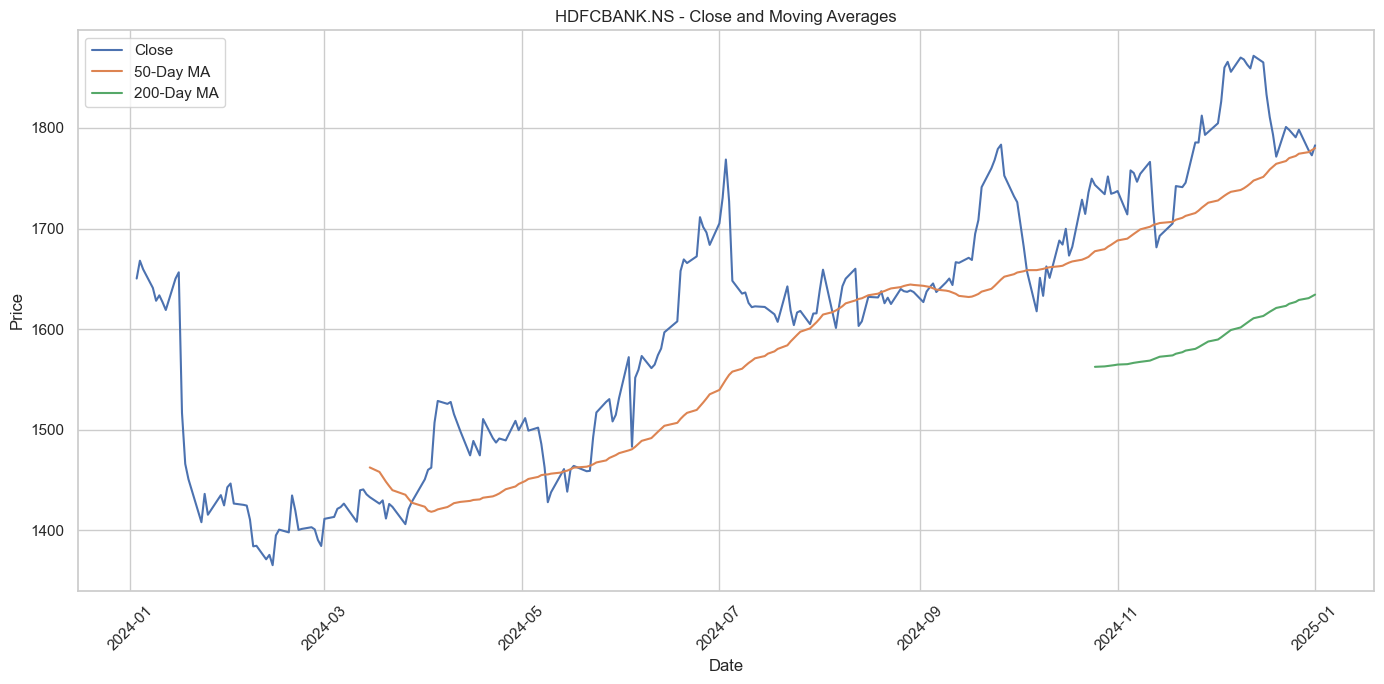

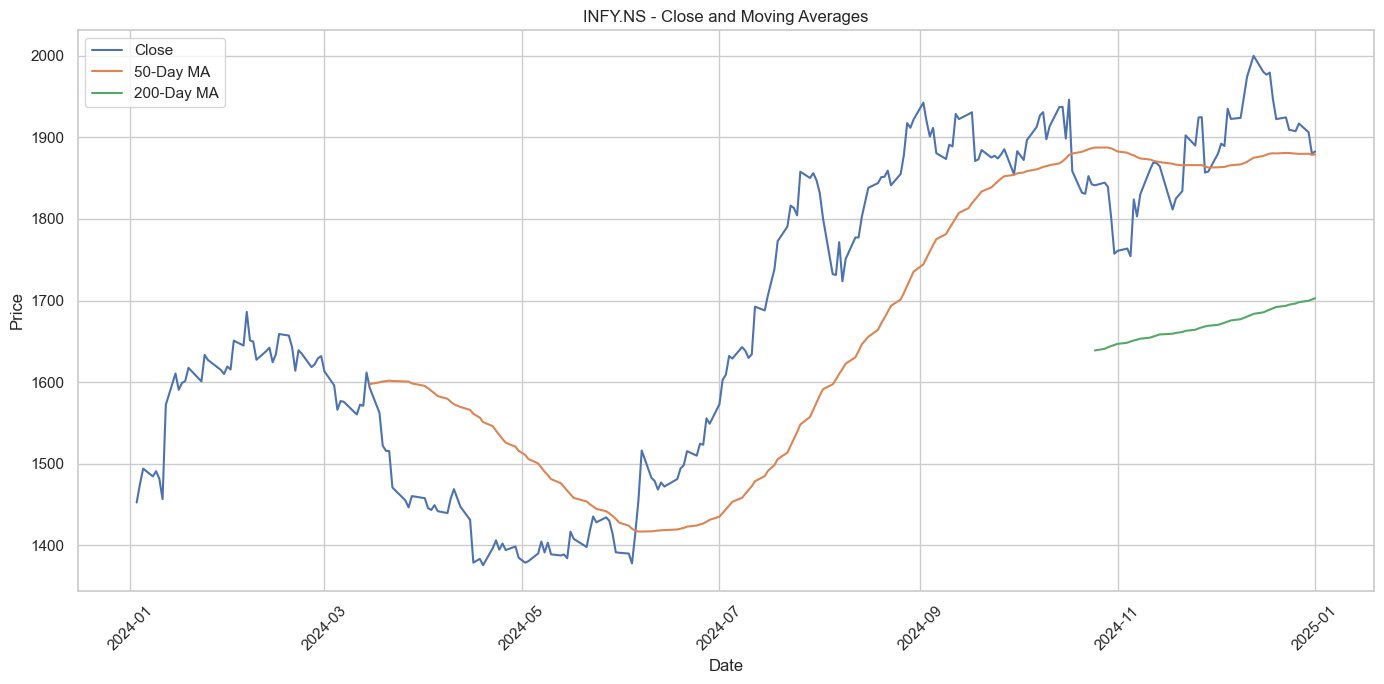

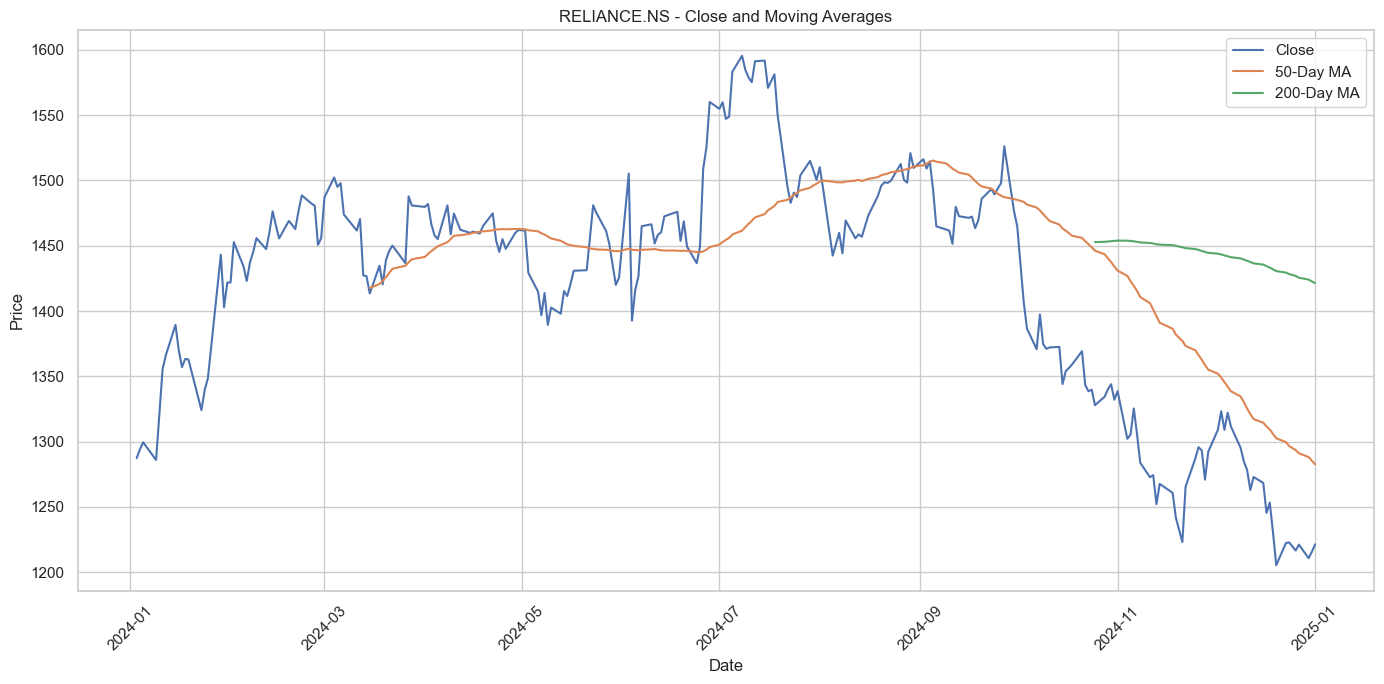

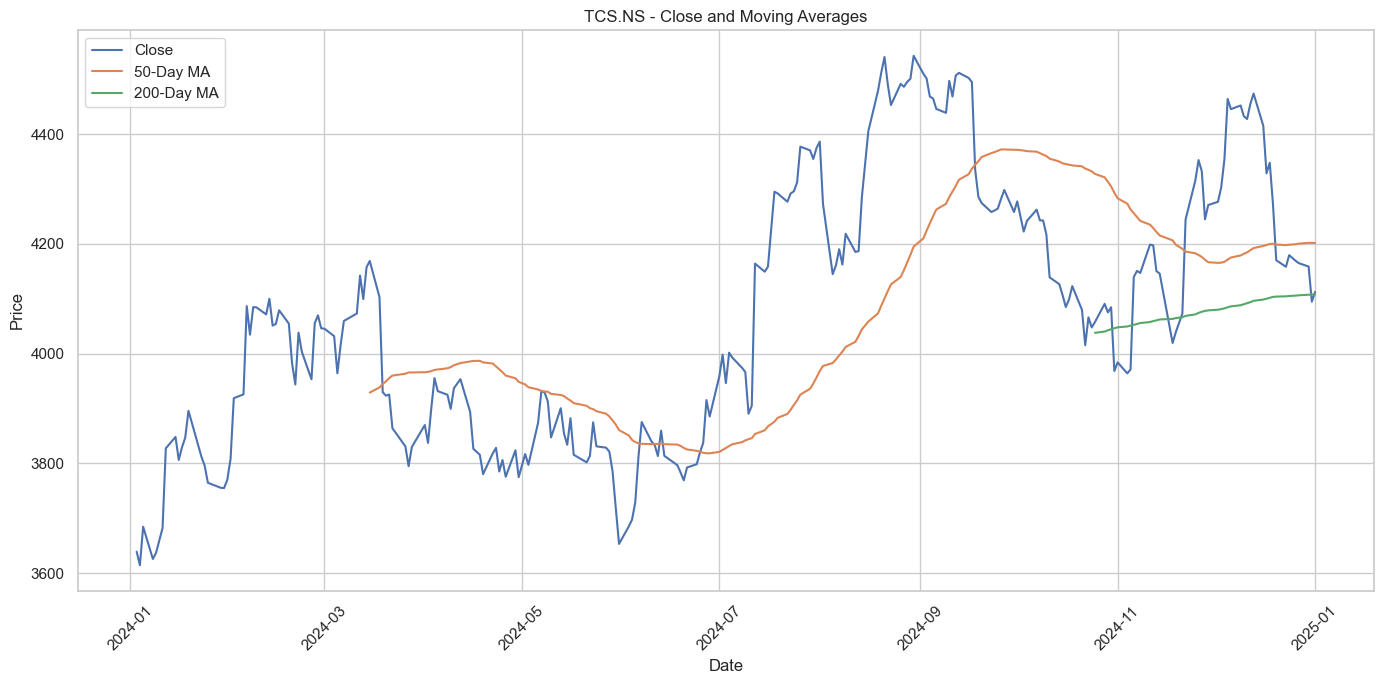

In [23]:
short_window = 50
long_window = 200

stock_data.set_index('Date', inplace=True)
unique_tickers = stock_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    ticker_data['50_MA'] = ticker_data['Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Close'].rolling(window=long_window).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Close'], label='Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

   

The graph of HDFC Bank's closing prices exhibits a clear upward trend, albeit with some fluctuations. These variations indicate periodic adjustments, but the overall trajectory remains positive.<br>

The closing prices of (INFY) demonstrate significant volatility. Initially, the price experienced an increase, followed by a steady decline for several months. However, in the middle of the year, the prices began to rebound, signaling a recovery and renewed growth.<br>

Reliance Industries' closing price remained relatively stable around ₹1400 for a considerable period, but over the course of a quarter, it exhibited a consistent downward movement, reflecting a period of negative performance.<br>

For Tata Consultancy Services (TCS), the first half of the year saw the closing prices fluctuating around ₹3800. However, in the latter half, the stock experienced a notable upward movement, with prices increasing by an average of ₹400, indicating a strong rally in the second half of the year.<br>

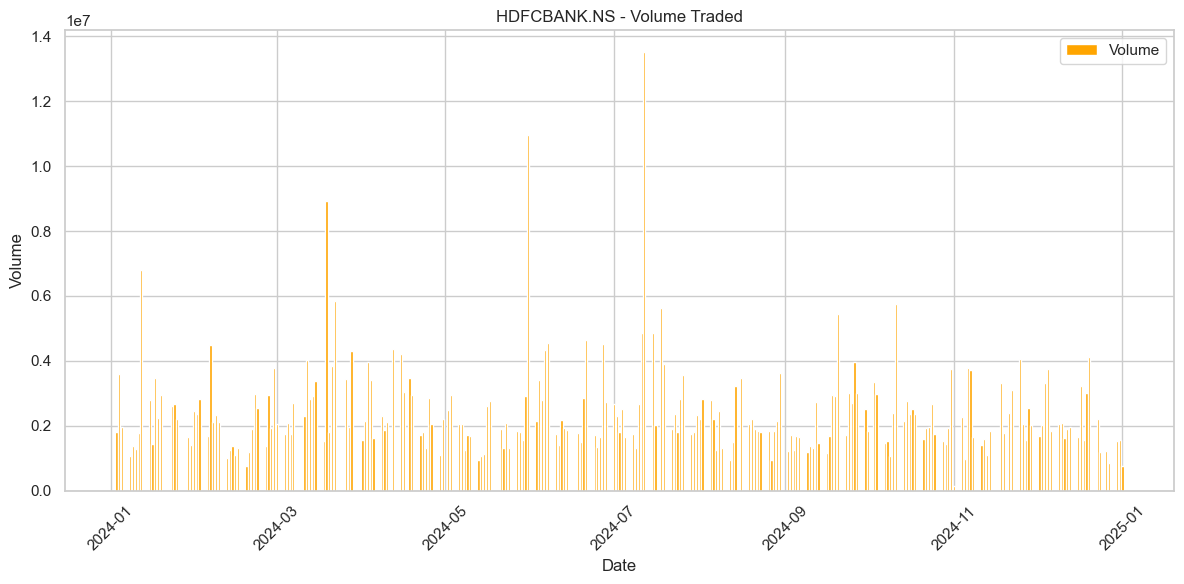

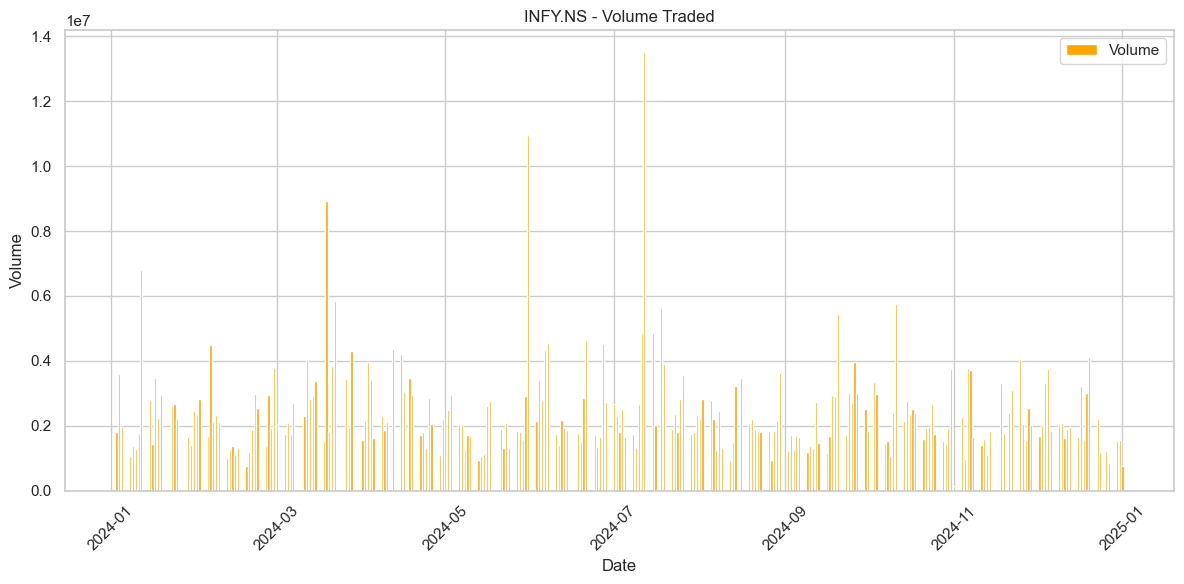

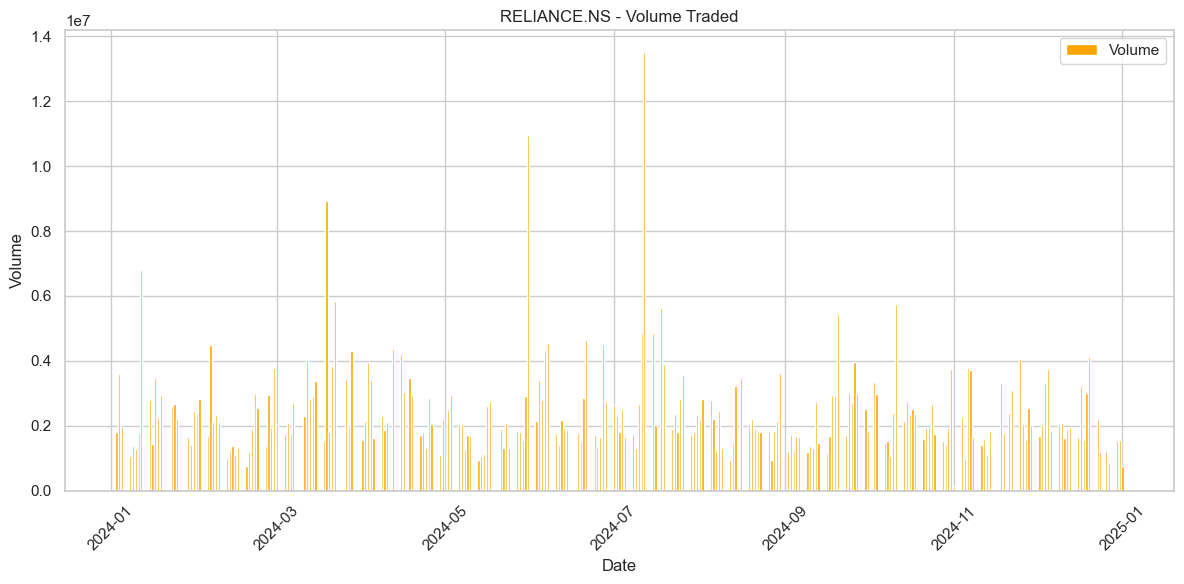

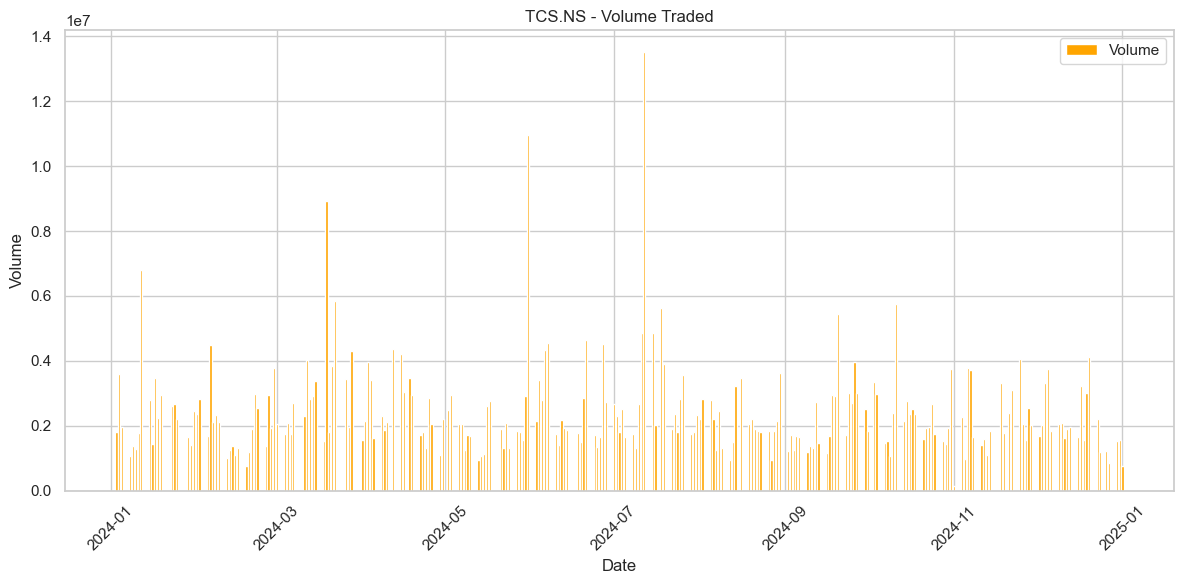

In [42]:
for ticker in unique_tickers:
    plt.figure(figsize=(12,6))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [31]:
returns = data['Close'].pct_change().dropna()
returns

Ticker,HDFCBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
1,0.010730,0.015235,0.005168,-0.006758
2,-0.005116,0.013122,0.004256,0.019390
3,-0.011146,-0.006362,-0.007804,-0.015945
4,-0.007785,0.004268,-0.002648,0.003154
5,0.003302,-0.006147,0.026972,0.006274
...,...,...,...,...
240,-0.004088,-0.000864,-0.005070,-0.002488
241,0.004188,0.004902,0.003699,-0.001019
242,-0.011317,-0.005608,-0.008476,-0.001453
243,-0.002840,-0.013641,0.003923,-0.015389


In [39]:
mean_returns=returns.mean()
mean_returns

Ticker
HDFCBANK.NS    0.000417
INFY.NS        0.001165
RELIANCE.NS   -0.000112
TCS.NS         0.000588
dtype: float64

Stock prices usually change by a small fraction on a daily basis, and daily returns are expressed as a percentage (or decimal).
For example, a return of 0.000417 is equivalent to 0.0417% for that day. When compounded over a year, these mean returns can result in significant cumulative annual returns. 

In [41]:
cov_matrix = returns.cov()
cov_matrix

Ticker,HDFCBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
Ticker,,,,
HDFCBANK.NS,0.000199,0.000017,0.000062,0.000010
INFY.NS,0.000017,0.000205,0.000040,0.000130
RELIANCE.NS,0.000062,0.000040,0.000209,0.000051
TCS.NS,0.000010,0.000130,0.000051,0.000176


**DIagonal Elements are variance** : A higher variance indicates higher volatility, meaning the stock price fluctuates more widely. In this case, RELIANCE.NS has the highest variance, suggesting that it has the most volatility, while TCS.NS has the lowest variance, suggesting it is the least volatile.

**Non-diagonal Elements(covariance between different stocks):** The small value indicates that the two stocks have a very low correlation in terms of their daily returns. The closer the covariance is to 0, the less the two stocks move together. Highest Corrrelated stocks are INFY and TCS and less correlated are TCS and HDFC.

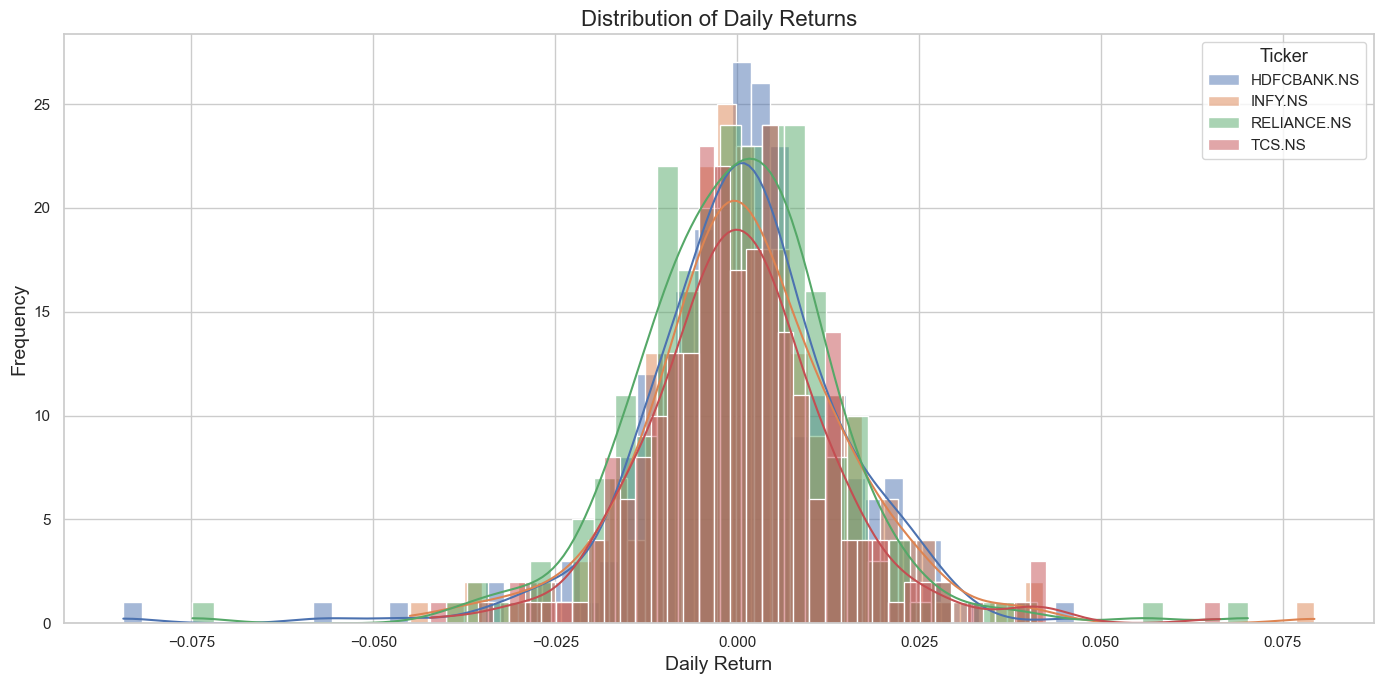

In [43]:
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

The Above graph shows the voltailty of stocks.

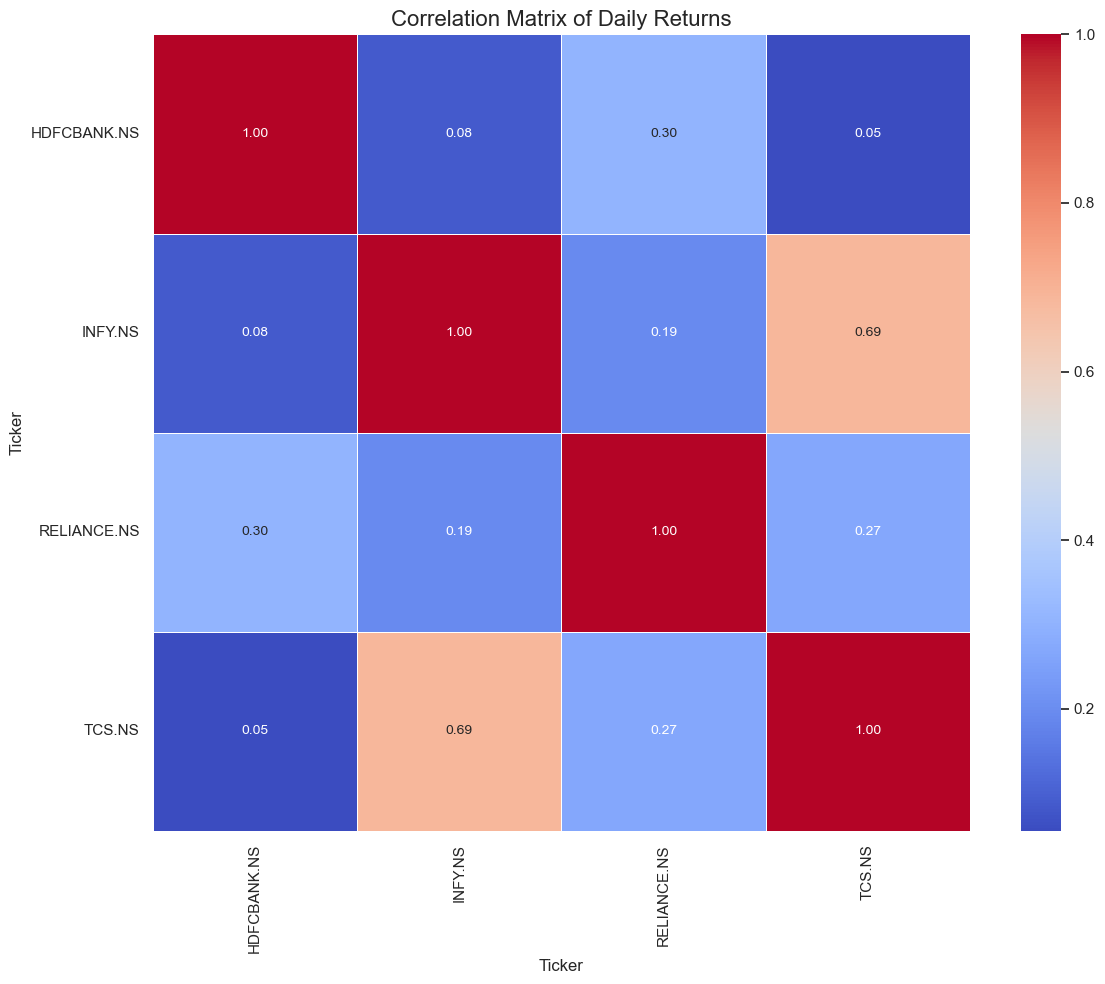

In [45]:
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Here we have same results as in above table.

In [46]:
import numpy as np

expected_returns = daily_returns.mean() * 252  # annualize the returns
volatility = daily_returns.std() * np.sqrt(252)  # annualize the volatility

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

stock_stats

,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.104962,0.224002
INFY.NS,0.293457,0.227216
RELIANCE.NS,-0.028129,0.229571
TCS.NS,0.148165,0.210375


Reliance has highest risk and INFY provides highest return.Overall TCS is better option with lowest risk and better return option.

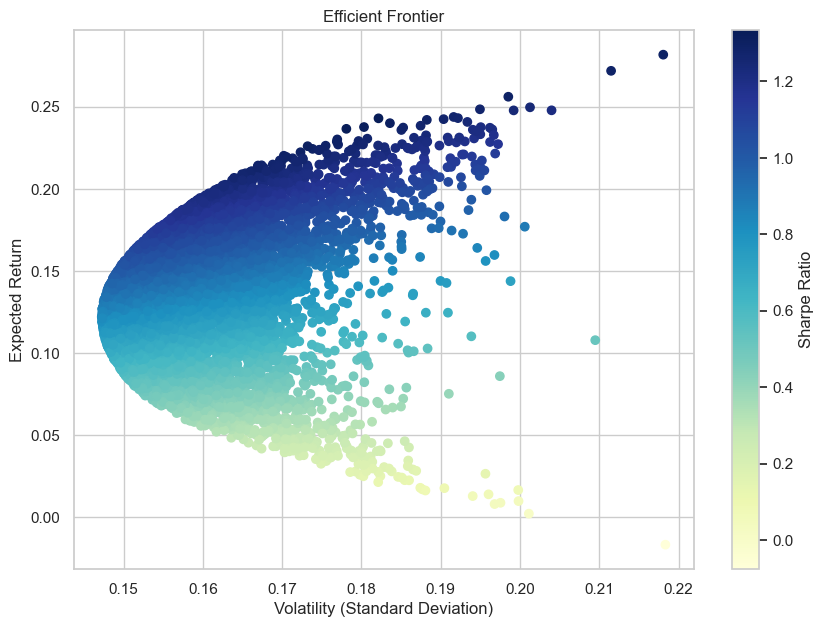

In [47]:
# function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# number of portfolios to simulate
num_portfolios = 10000

# arrays to store the results
results = np.zeros((3, num_portfolios))

# annualized covariance matrix
cov_matrix = daily_returns.cov() * 252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

In [48]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.2429720728244737, 0.18214901092564478, 1.3339192542948122)

Expected Return 24% <br> Volatility 18.21% <br> Sharpe ratio 1.33

In [49]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df

,Ticker,Weight
0,HDFCBANK.NS,0.328762
1,INFY.NS,0.135164
2,RELIANCE.NS,0.183495
3,TCS.NS,0.352579


The output shows a diversified portfolio with the following allocations:

HDFCBANK (32.87%)<br>
INFY (13.51%)<br>
RELIANCE (18.34%)<br>
and TCS (35.25%).<br>